# HW3


Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [ ]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [ ]:
def sigmoid(x):
    #Your code here
    y = 1 / (1 + np.exp(-x))
    return y

Let's try your implementation of the sigmoid function on the following values to make sure it is working fine:

1. x = -1.5
2. x = 0
3. x = 2.5

In [ ]:
print('sigmoid(-1.5) = ', sigmoid(-1.5))
print('sigmoid(0) = ', sigmoid(0))
print('sigmoid(2.5) = ', sigmoid(2.5))

sigmoid(-1.5) =  0.18242552380635635
sigmoid(0) =  0.5
sigmoid(2.5) =  0.9241418199787566


Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [ ]:
def model(x,w):
    #Your code here
    return np.dot(x.T, w[1:]) + w[0]

def cross_entropy(w,x,y):
    #Your code here
    p = sigmoid(model(x, w))
    return -(1.0 / y.size) * np.sum(y * np.log(p + .0000000001) + (1 - y) * np.log(1 - p + .0000000001))

Run the code below to read a data file and plot a scatter plot of x vs y.

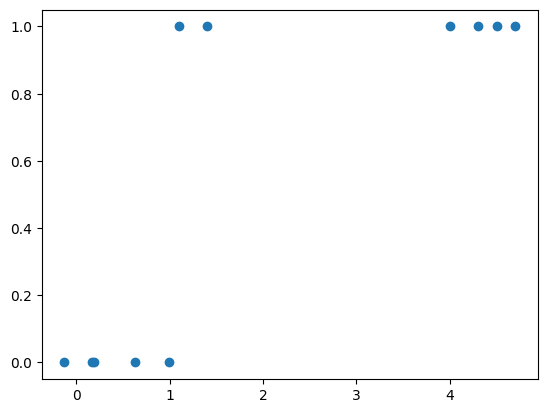

In [ ]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

plt.scatter(x,y)

Q3) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=1500,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [ ]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w0,x,y):
    gradient = grad(g)
    w = w0
    cost_history = [g(w,x,y)]
    weight_history = [w]
    for i in range(max_its):
      w = w - alpha*gradient(w,x,y)
      cost_history.append(g(w,x,y))
      weight_history.append(w)
    return weight_history,cost_history



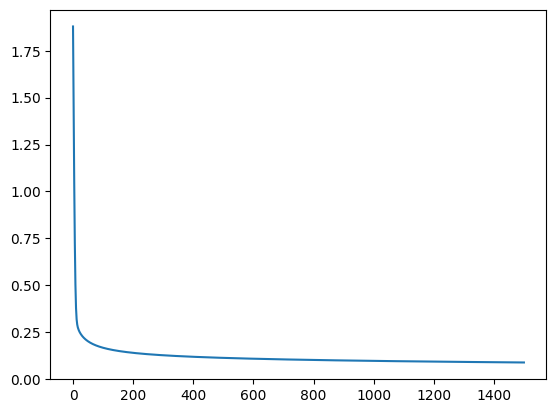

In [ ]:
##Call the gradient_descent function here
##Plot the cost history here
weights_1, costs_1 = gradient_descent(cross_entropy, 1, 1500, np.array([3.0, 3.0]), x, y)
plt.plot(costs_1)
plt.show()

Q4) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [ ]:
def logistic_regression(learned_w,x):
    #your code here
    return sigmoid(model(x, learned_w))

Q5) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from before.


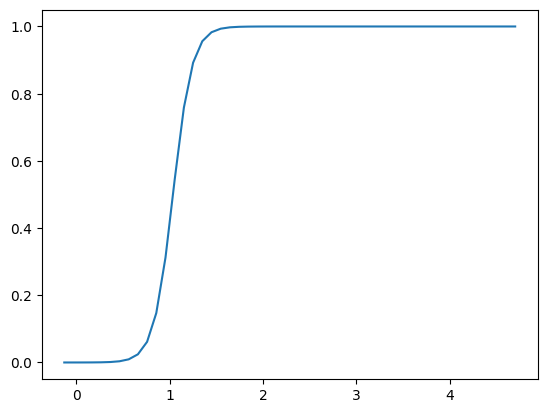

In [ ]:
s = np.linspace(np.min(x), np.max(x))
#Your code here
plt.plot(s, logistic_regression(weights_1[-1], np.array([s])))
plt.show()

Q6) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [ ]:
def logistic_regression_modified(learned_w,x, threshold):
    #your code here
    return sigmoid(model(x, learned_w)) > threshold

Q7) [15 points] Write a function (called evaluate) that takes in actual and
predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [ ]:
def evaluate(y_actual, y_pred):
    true_positive = np.sum(np.where((y_pred == 1) & (y_actual == 1)))
    true_negative = np.sum(np.where((y_pred == 0) & (y_actual == 0)))
    false_positive = np.sum(np.where((y_pred == 1) & (y_actual == 0)))
    false_negative = np.sum(np.where((y_pred == 0) & (y_actual == 1)))
    accuracy = (true_positive + true_negative) / np.sum(true_negative+true_positive+false_negative+false_positive)
    return false_positive, false_negative, true_positive, true_negative, accuracy

evaluate(y, logistic_regression_modified(run1_wh[-1], x, 0.5))

(0, 0, 45, 10, 1.0)

Q8) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [ ]:
def perceptron_cost(w,x,y):
  #Your code here
  return np.sum(np.log(1 + np.exp(-y * model(x, w)))) / float(y.size)

Q9) [10 points]
* Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=1500,w=[1.0,1.0], and alpha=1.0.
* Save the cost and weight history returned by the gradient descent function.
* Plot the cost history.
* Answer: Which cost seems to do better on this dataset? Why do think that is?


The cost seems to be better on cross-entropy loss as it plateaus faster and lower for this specific dataset and model

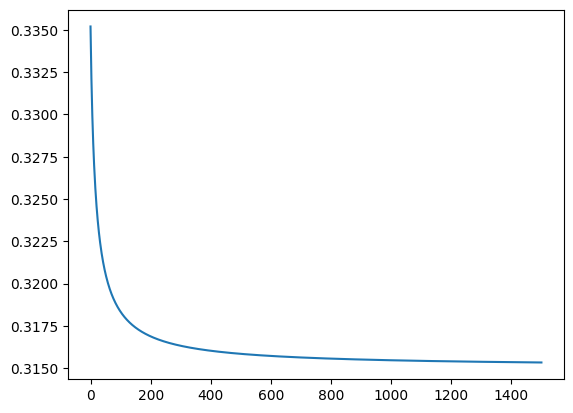

In [ ]:
##Call the gradient_descent function here
##Plot the cost history here
weights_2, costs_2 = gradient_descent(perceptron_cost, 1, 1500, np.array([1.0, 1.0]), x, y)
plt.plot(costs_2)
plt.show()

Q10) [11 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns.

* Read the data file. (Note that the first line is the header describing each column.)
* Use the data above to set y to be the "target" and X to be the remaining columns.
* Split your data into 80% train 20% test using train_test_split.
* Use sklearn to fit a logistic regression model on your training set. Use all the default parameters. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
## import logistic regression and the train_test split functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##Your code here
data = np.loadtxt('heart.csv', delimiter=',', skiprows=1)
X = data[:, :-1]
y = data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Q11) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [ ]:
##Your code here
y_pred = model.predict_proba(x_test)

Q12) [12 points]

Now you will report your results.

* Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. (I.e., you should no longer have tuples.)
* Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters).
* Print out the thresholds generated by the roc_curve function.
* Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score.

In [ ]:
##Your code here
from sklearn.metrics import roc_curve, roc_auc_score
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(thresholds)
print(roc_auc_score(y_test, y_pred))

[       inf 0.98995893 0.96566979 0.96145662 0.86832405 0.86340561
 0.8030378  0.78890717 0.69819487 0.68339833 0.66537427 0.66387409
 0.37886651 0.06921084 0.05466173 0.02941921 0.02591851 0.00373212]
0.8857142857142857


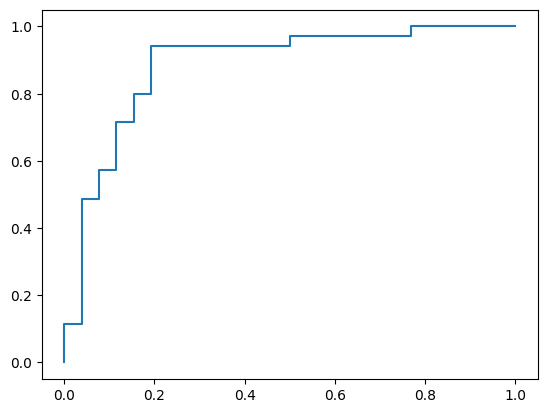

In [ ]:
##Your code here
plt.plot(fpr, tpr)
plt.show()
